In [2]:
import pandas as pd
import numpy as np
import us


from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

import glob
import os

In [3]:
# Read in prescription rate data for each state.
years = range(2006, 2017)

rx = np.zeros((51, len(years)))

for i, year in enumerate(years):
    data = pd.read_csv('data/Prescriptions/state/rxrate_{}.csv'.format(year), delimiter=',')
    for key in data.keys():
        if 'Rate' in key:
            rx[:, i] = data[key]
            
    states = list(data['State ABBR'])

In [10]:
# Read in drug overdose data for each state.
df = np.zeros((51, len(years)))

for i, year in enumerate(years):
    data = np.genfromtxt('data/Compressed Mortality by State/Compressed Mortality State, {}.csv'.format(year), delimiter=',')
    print(data.shape)
    df[:, i] = data[:, 4]

(51, 5)
(51, 5)
(51, 5)
(35, 5)


ValueError: could not broadcast input array from shape (35) into shape (51)

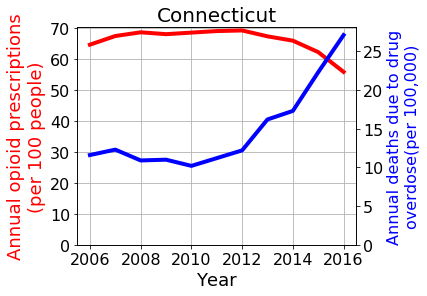

In [277]:
# Read in prescription rate data for each state.
state_id = 6

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(years, rx[state_id, :], 'r-', linewidth=4)

ax2 = ax.twinx()
ax2.plot(years, df[state_id, :], 'b-', linewidth=4)

#ax.set_title(states[state_id])
ax.set_title('Connecticut', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Annual opioid prescriptions\n(per 100 people)', color='r', fontsize=18)
ax2.set_ylabel('Annual deaths due to drug\noverdose(per 100,000)', color='b', fontsize=16)
ax.grid()


ax.set_ylim([0, np.max(rx[state_id, :]) + 1])
ax2.set_ylim([0, np.max(df[state_id, :]) + 1])

#plt.xticks(years)

for item in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(16)
    
plt.savefig('connecticut.png', dpi=200)

In [208]:
# Histogram of difference between year of peak prescription rate and year of peak drug overdose rate.
diff_year = np.zeros(len(states))
for i, state in enumerate(states):
    df_state = df[i, :]
    peak_year_df = years[np.argmax(df_state)]
    
    rx_state = rx[i, :]
    peak_year_rx = years[np.argmax(rx_state)]
    
    diff_year[i] = peak_year_df - peak_year_rx
    
    #if diff_year[i] == 8:
    #    print(i, state)

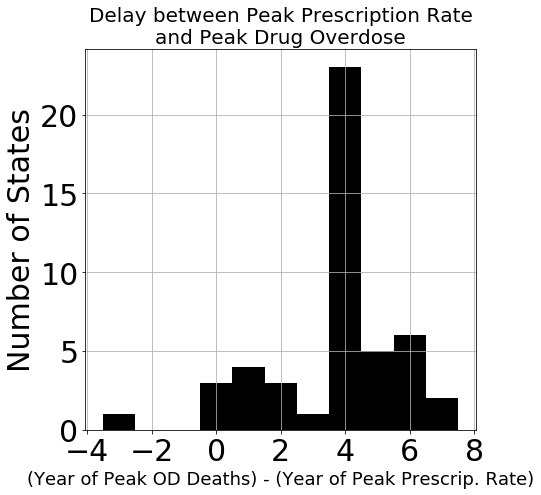

In [293]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.hist(diff_year, bins=np.arange(-3.5, 8.5, 1), color='black')
ax.set_title('Delay between Peak Prescription Rate\nand Peak Drug Overdose', fontsize=20)
ax.set_xlabel('(Year of Peak OD Deaths) - (Year of Peak Prescrip. Rate)', fontsize=18)
ax.set_ylabel('Number of States', fontsize=30)

ax.grid()

plt.xticks(np.arange(-4, 10, 2))

for item in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(30)
    
plt.savefig('figures/delay.png', dpi=200)

In [114]:
# Histogram of difference between year of peak prescription rate and year of peak drug overdose rate.
diff_rx = np.zeros(len(states))
diff_df = np.zeros(len(states))


for i, state in enumerate(states):
    diff_rx[i] = 1e2*(rx[i, -1] - rx[i, -5]) / rx[i, -5]
    diff_df[i] = 1e2*(df[i, -1] - df[i, -5]) / df[i, -5]

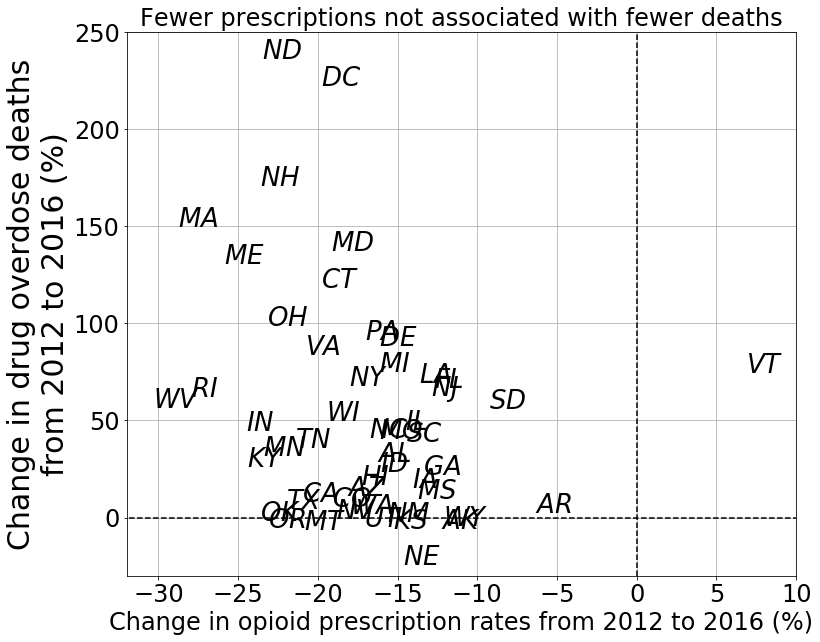

In [305]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

for i, state in enumerate(states):
    ax.annotate("${}$".format(state), xy=(diff_rx[i], diff_df[i]), 
                xytext=(diff_rx[i]-.45, diff_df[i]-4), fontsize=26)
    
    ax.scatter(diff_rx[i], diff_df[i], s=300,
        marker=r"${}$".format(state), c='w')

ax.plot([0, 0], [np.min(diff_df)-10, np.max(diff_df)+10], 'k--')
ax.plot([np.min(diff_rx)-10, np.max(diff_rx)+10], [0, 0], 'k--')

ax.set_title('Fewer prescriptions not associated with fewer deaths', fontsize=24)
ax.set_xlabel('Change in opioid prescription rates from 2012 to 2016 (%)', fontsize=24)
ax.set_ylabel('Change in drug overdose deaths\nfrom 2012 to 2016 (%)', fontsize=30)

ax.set_xlim([-32, 10])
ax.set_ylim([-30, 250])
ax.grid()

for item in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(24)
    
plt.savefig('figures/prescriptions_vs_deaths.png', dpi=200)